In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# Generate the Cities List by Using the citipy Library

In [2]:
# list for holding latitude and longitude and cities
lat_lngs = []
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 565


# Showcase the Relationship Between Weather Variables and Latitude

In [4]:
# API base URL
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial"
query_url = base_url +"&appid=" + weather_api_key + "&q="

# empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in the list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # endpoint URL with each city
    city_url = query_url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | atafu village
Processing Record 2 of Set 1 | waitangi
Processing Record 3 of Set 1 | arraial do cabo
Processing Record 4 of Set 1 | vorgashor
Processing Record 5 of Set 1 | bethel
Processing Record 6 of Set 1 | nema
Processing Record 7 of Set 1 | edinburgh of the seven seas
Processing Record 8 of Set 1 | palu
Processing Record 9 of Set 1 | mucumpiz
Processing Record 10 of Set 1 | puerto natales
Processing Record 11 of Set 1 | ivdel'
Processing Record 12 of Set 1 | college
Processing Record 13 of Set 1 | invercargill
Processing Record 14 of Set 1 | aasiaat
Processing Record 15 of Set 1 | enewetak
Processing Record 16 of Set 1 | adamstown
Processing Record 17 of Set 1 | ulanhot
Processing Record 18 of Set 1 | utrik
Processing Record 19 of Set 1 | blackmans bay
Processing Record 20 of Set 1 | dhidhdhoo
Processing Record 21 of Set 1 | dalby
Processing Record 22 of Set 1 | sarakhs
Processing Record 23

Processing Record 40 of Set 4 | remire-montjoly
Processing Record 41 of Set 4 | jamestown
Processing Record 42 of Set 4 | hammerfest
Processing Record 43 of Set 4 | kingsford
Processing Record 44 of Set 4 | hun
Processing Record 45 of Set 4 | waingapu
Processing Record 46 of Set 4 | sao vicente
Processing Record 47 of Set 4 | kurmuk
Processing Record 48 of Set 4 | la passe
Processing Record 49 of Set 4 | saint-philippe
Processing Record 0 of Set 5 | nyandoma
Processing Record 1 of Set 5 | tughyl
Processing Record 2 of Set 5 | ytyk-kyuyel'
City not found. Skipping...
Processing Record 3 of Set 5 | nagqu
Processing Record 4 of Set 5 | bukene
Processing Record 5 of Set 5 | mar del plata
Processing Record 6 of Set 5 | eisenach
Processing Record 7 of Set 5 | tiksi
Processing Record 8 of Set 5 | pisco
Processing Record 9 of Set 5 | myeik
Processing Record 10 of Set 5 | inhambane
Processing Record 11 of Set 5 | morehead city
Processing Record 12 of Set 5 | dejen
Processing Record 13 of Set 5 

Processing Record 30 of Set 8 | kutum
Processing Record 31 of Set 8 | severo-yeniseyskiy
Processing Record 32 of Set 8 | l'estaque
Processing Record 33 of Set 8 | puerto armuelles
Processing Record 34 of Set 8 | kamina
Processing Record 35 of Set 8 | myski
Processing Record 36 of Set 8 | twon-brass
Processing Record 37 of Set 8 | huarmey
Processing Record 38 of Set 8 | monrovia
Processing Record 39 of Set 8 | midvagur
Processing Record 40 of Set 8 | trairi
Processing Record 41 of Set 8 | pandan
Processing Record 42 of Set 8 | ridder
Processing Record 43 of Set 8 | carora
Processing Record 44 of Set 8 | kill devil hills
Processing Record 45 of Set 8 | hovd
Processing Record 46 of Set 8 | sao tome
Processing Record 47 of Set 8 | puerto san jose
Processing Record 48 of Set 8 | jebba
Processing Record 49 of Set 8 | sur
Processing Record 0 of Set 9 | northam
Processing Record 1 of Set 9 | port alberni
Processing Record 2 of Set 9 | kimbe
Processing Record 3 of Set 9 | malango
Processing Rec

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          540
Lat           540
Lng           540
Max Temp      540
Humidity      540
Cloudiness    540
Wind Speed    540
Country       540
Date          540
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,atafu village,-8.5421,-172.5159,84.25,77,58,12.30,TK,1683861778
1,waitangi,-43.9535,-176.5597,49.82,83,48,5.01,NZ,1683861778
2,arraial do cabo,-22.9661,-42.0278,72.84,73,95,10.63,BR,1683861779
3,vorgashor,67.5833,63.9500,17.62,89,22,6.15,RU,1683861779
4,bethel,41.3712,-73.4140,62.55,69,0,3.44,US,1683861526


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,atafu village,-8.5421,-172.5159,84.25,77,58,12.30,TK,1683861778
1,waitangi,-43.9535,-176.5597,49.82,83,48,5.01,NZ,1683861778
2,arraial do cabo,-22.9661,-42.0278,72.84,73,95,10.63,BR,1683861779
3,vorgashor,67.5833,63.9500,17.62,89,22,6.15,RU,1683861779
4,bethel,41.3712,-73.4140,62.55,69,0,3.44,US,1683861526


# Scatter Plots

### Latitude Vs. Temperature

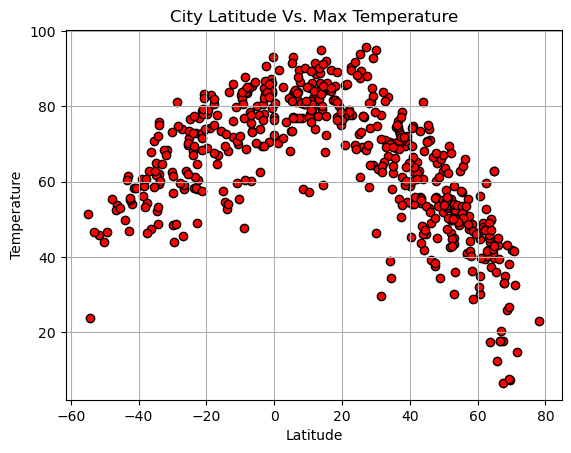

In [13]:
# scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], linewidth = 1.0, marker = 'o', edgecolor = 'black', color='red')
plt.title("City Latitude Vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.grid()

plt.savefig("output_data/Fig1.png")

plt.show()

### Latitude Vs. Humidity

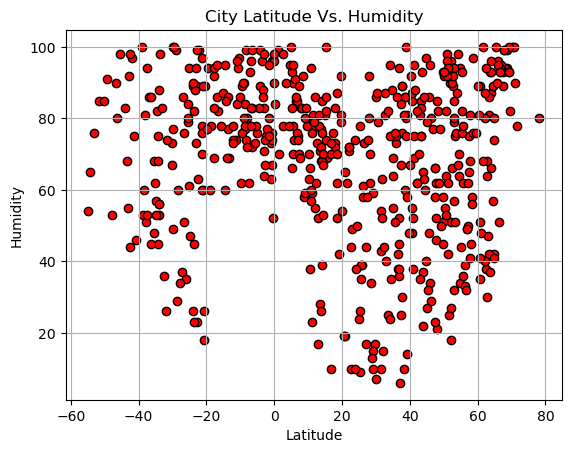

In [14]:
# scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], linewidth = 1.0, marker = 'o', edgecolor = 'black', color='red')
plt.title("City Latitude Vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()

plt.savefig("output_data/Fig2.png")

plt.show()

### Latitude Vs. Cloudiness

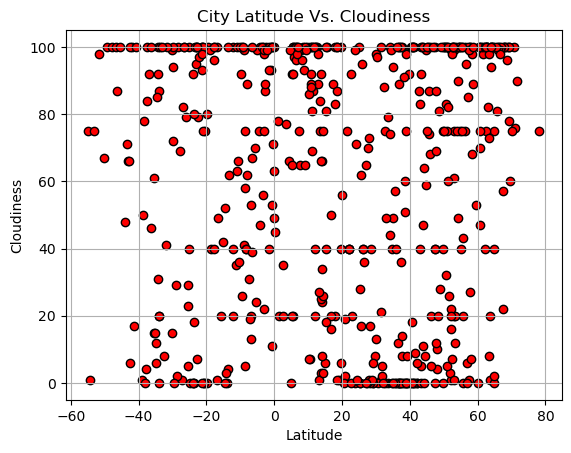

In [15]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], linewidth = 1.0, marker = 'o', edgecolor = 'black', color='red')
plt.title("City Latitude Vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()

plt.savefig("output_data/Fig3.png")

plt.show()

### Latitude Vs. Wind Speed

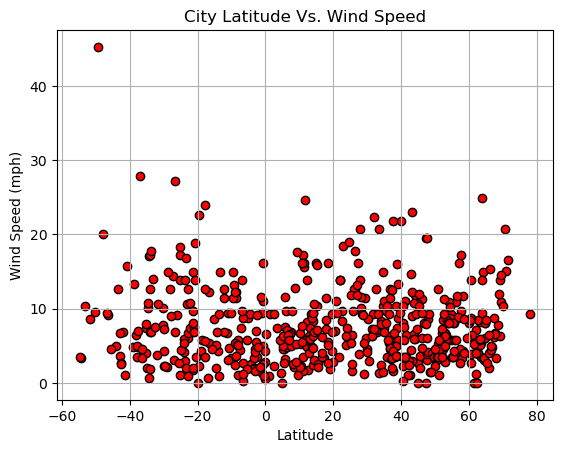

In [16]:
# scatter plot for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], linewidth = 1.0, marker = 'o', edgecolor = 'black', color='red')
plt.title("City Latitude Vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

plt.savefig("output_data/Fig4.png")

plt.show()

# Compute Linear Regression for Each Relationship

In [ ]:
# Define a function to create Linear Regression plots
def lin_regress(x, y, xlab, ylab, anox, anoy)
    x_values = x
    y_values = y
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(anox, anoy),fontsize=15,color="red")
    plt.xlabel(xlab)
    plt.ylabel(ylab)

In [ ]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

### Temperature Vs. Latitude 

In [ ]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE